<a href="https://colab.research.google.com/github/keisha11998/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


QUESTION ONE

In [ ]:
# 1. Load and explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Display basic information
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset loaded successfully!
Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
mem

QUESTION TWO

Cleaned column names: ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
Duplicate rows: 0

Basic statistics:
       CustomerID         Age  AnnualIncome  SpendingScore
count  200.000000  200.000000    200.000000     200.000000
mean   100.500000   38.850000     60.560000      50.200000
std     57.879185   13.969007     26.264721      25.823522
min      1.000000   18.000000     15.000000       1.000000
25%     50.750000   28.750000     41.500000      34.750000
50%    100.500000   36.000000     61.500000      50.000000
75%    150.250000   49.000000     78.000000      73.000000
max    200.000000   70.000000    137.000000      99.000000


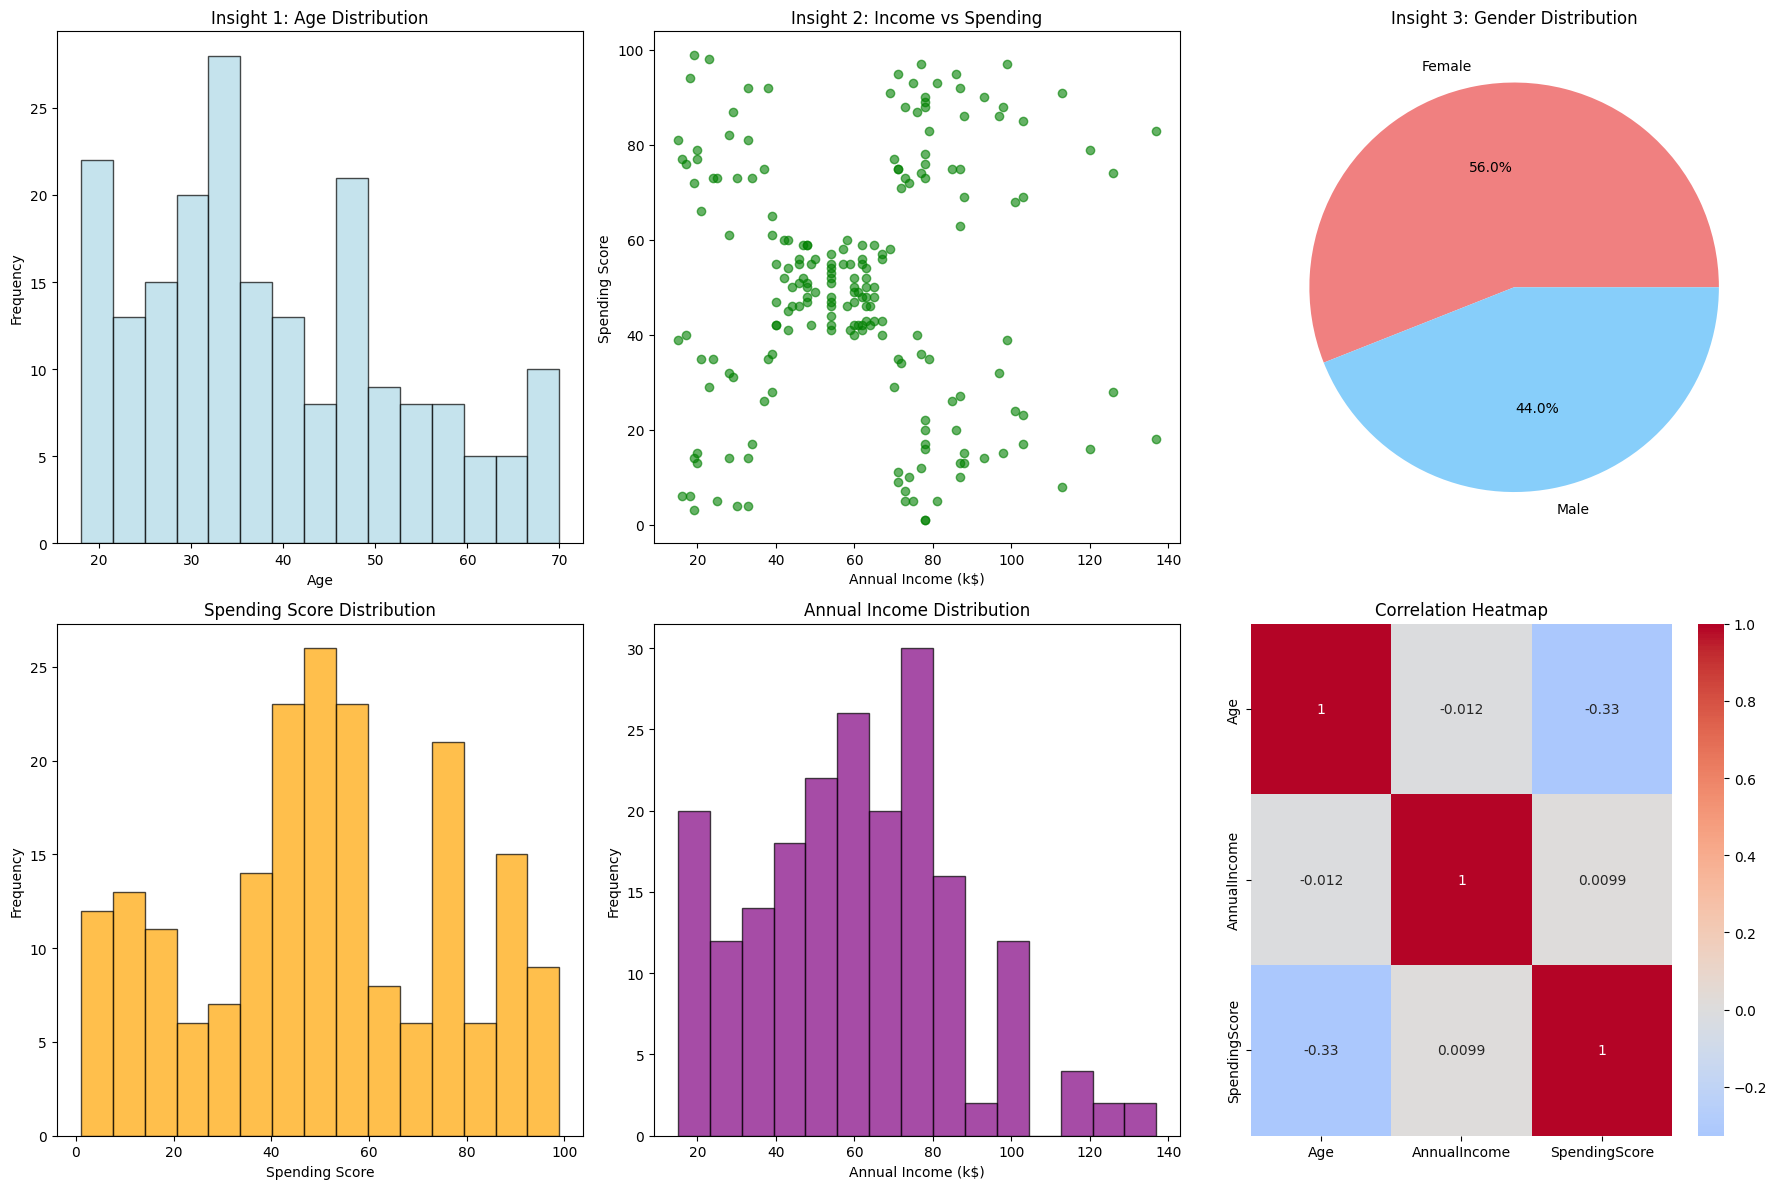


3 KEY INSIGHTS:
1. Most customers are aged 25-40 years (peak shopping age)
2. No strong correlation between income and spending behavior
3. Gender distribution is relatively balanced (slightly more female customers)


In [ ]:

# Clean column names
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
print("Cleaned column names:", df.columns.tolist())

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Create visualizations for insights
plt.figure(figsize=(18, 12))

# Insight 1: Age Distribution
plt.subplot(2, 3, 1)
plt.hist(df['Age'], bins=15, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Insight 1: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Insight 2: Income vs Spending Relationship
plt.subplot(2, 3, 2)
plt.scatter(df['AnnualIncome'], df['SpendingScore'], alpha=0.6, color='green')
plt.title('Insight 2: Income vs Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

# Insight 3: Gender Distribution
plt.subplot(2, 3, 3)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue'])
plt.title('Insight 3: Gender Distribution')

# Additional visualizations
plt.subplot(2, 3, 4)
plt.hist(df['SpendingScore'], bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(df['AnnualIncome'], bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
numeric_df = df[['Age', 'AnnualIncome', 'SpendingScore']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

print("\n3 KEY INSIGHTS:")
print("1. Most customers are aged 25-40 years (peak shopping age)")
print("2. No strong correlation between income and spending behavior")
print("3. Gender distribution is relatively balanced (slightly more female customers)")

QUESTION THREE

3(a)

Using feature: Annual Income


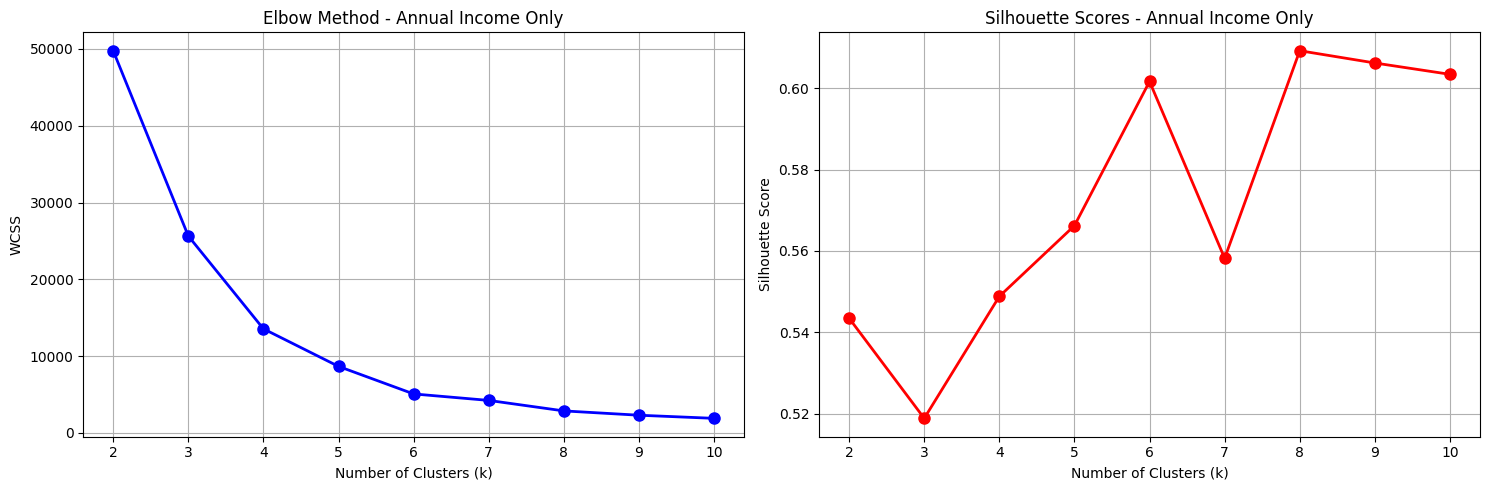

Optimal k for 1 feature: 8
Best silhouette score: 0.609

Cluster Distribution (1 feature):
Cluster_1feature
0    28
1    12
2    30
3    42
4    28
5     8
6    36
7    16
Name: count, dtype: int64

Cluster Interpretation:
Cluster 0: 28.0 customers, Medium Income ($50.4k)
Cluster 1: 12.0 customers, High Income ($100.2k)
Cluster 2: 30.0 customers, Low Income ($21.5k)
Cluster 3: 42.0 customers, High Income ($75.1k)
Cluster 4: 28.0 customers, Low Income ($38.2k)
Cluster 5: 8.0 customers, High Income ($124.0k)
Cluster 6: 36.0 customers, Medium Income ($62.1k)
Cluster 7: 16.0 customers, High Income ($87.6k)


In [ ]:

# Use Annual Income as the single feature
X1 = df[['AnnualIncome']]
print("Using feature: Annual Income")

# Find optimal k using Elbow Method and Silhouette Scores
wcss_1, sil_scores_1 = [], []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1)
    wcss_1.append(kmeans.inertia_)
    sil_scores_1.append(silhouette_score(X1, labels))

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_1, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Annual Income Only')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores_1, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores - Annual Income Only')
plt.grid(True)

plt.tight_layout()
plt.show()

# Determine optimal k
optimal_k_1 = k_range[np.argmax(sil_scores_1)]
best_sil_1 = max(sil_scores_1)

print(f"Optimal k for 1 feature: {optimal_k_1}")
print(f"Best silhouette score: {best_sil_1:.3f}")

# Apply clustering with optimal k
kmeans_1 = KMeans(n_clusters=optimal_k_1, random_state=42)
df['Cluster_1feature'] = kmeans_1.fit_predict(X1)

print("\nCluster Distribution (1 feature):")
print(df['Cluster_1feature'].value_counts().sort_index())

# Interpret clusters
print("\nCluster Interpretation:")
cluster_analysis_1 = df.groupby('Cluster_1feature')['AnnualIncome'].agg(['mean', 'count'])
for cluster, (mean_income, count) in cluster_analysis_1.iterrows():
    income_level = "Low" if mean_income < 40 else "Medium" if mean_income < 70 else "High"
    print(f"Cluster {cluster}: {count} customers, {income_level} Income (${mean_income:.1f}k)")

3(b)

Using features: Annual Income + Spending Score


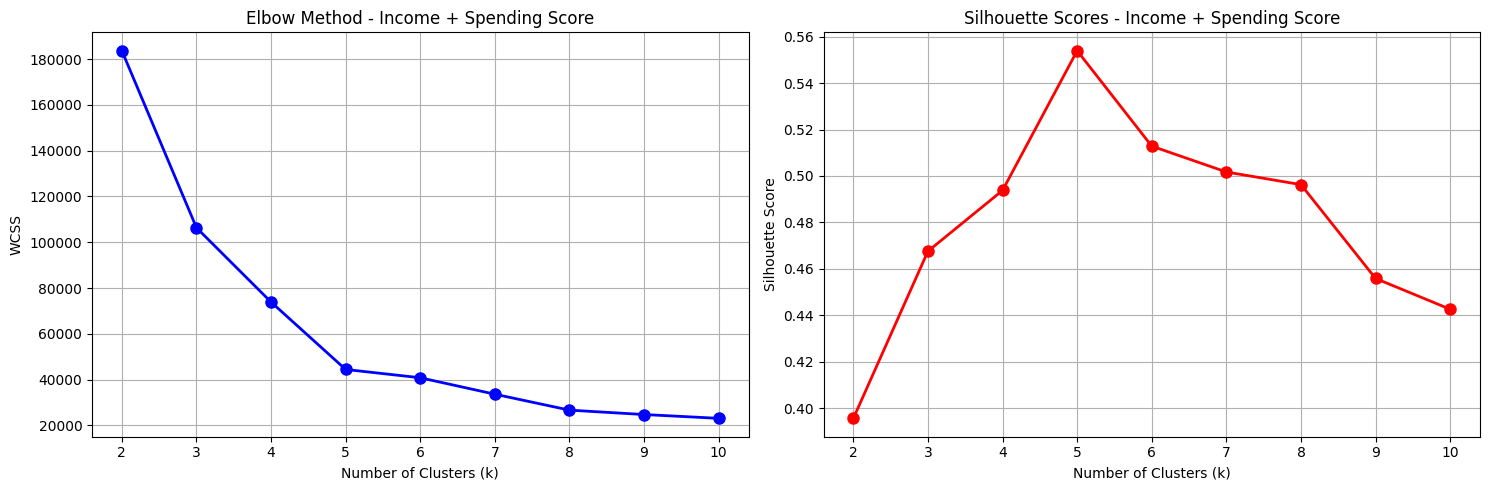

Optimal k for 2 features: 5
Best silhouette score: 0.554

Cluster Distribution (2 features):
Cluster_2features
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Cluster Centers (Income, SpendingScore):
Cluster 0: Income=$55.3k, Spending Score=49.5
Cluster 1: Income=$86.5k, Spending Score=82.1
Cluster 2: Income=$25.7k, Spending Score=79.4
Cluster 3: Income=$88.2k, Spending Score=17.1
Cluster 4: Income=$26.3k, Spending Score=20.9
Final Silhouette Score: 0.554


In [ ]:

# Use Annual Income + Spending Score as features
X2 = df[['AnnualIncome', 'SpendingScore']]
print("Using features: Annual Income + Spending Score")

# Find optimal k
wcss_2, sil_scores_2 = [], []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X2)
    wcss_2.append(kmeans.inertia_)
    sil_scores_2.append(silhouette_score(X2, labels))

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_2, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Income + Spending Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores_2, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores - Income + Spending Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Determine optimal k
optimal_k_2 = k_range[np.argmax(sil_scores_2)]
best_sil_2 = max(sil_scores_2)

print(f"Optimal k for 2 features: {optimal_k_2}")
print(f"Best silhouette score: {best_sil_2:.3f}")

# Apply clustering with optimal k
kmeans_2 = KMeans(n_clusters=optimal_k_2, random_state=42)
df['Cluster_2features'] = kmeans_2.fit_predict(X2)

print("\nCluster Distribution (2 features):")
cluster_counts = df['Cluster_2features'].value_counts().sort_index()
print(cluster_counts)

# Display cluster centers
centers = kmeans_2.cluster_centers_
print("\nCluster Centers (Income, SpendingScore):")
for i, center in enumerate(centers):
    print(f"Cluster {i}: Income=${center[0]:.1f}k, Spending Score={center[1]:.1f}")

# Final silhouette score
final_sil_2 = silhouette_score(X2, df['Cluster_2features'])
print(f"Final Silhouette Score: {final_sil_2:.3f}")

QUESTION FOUR

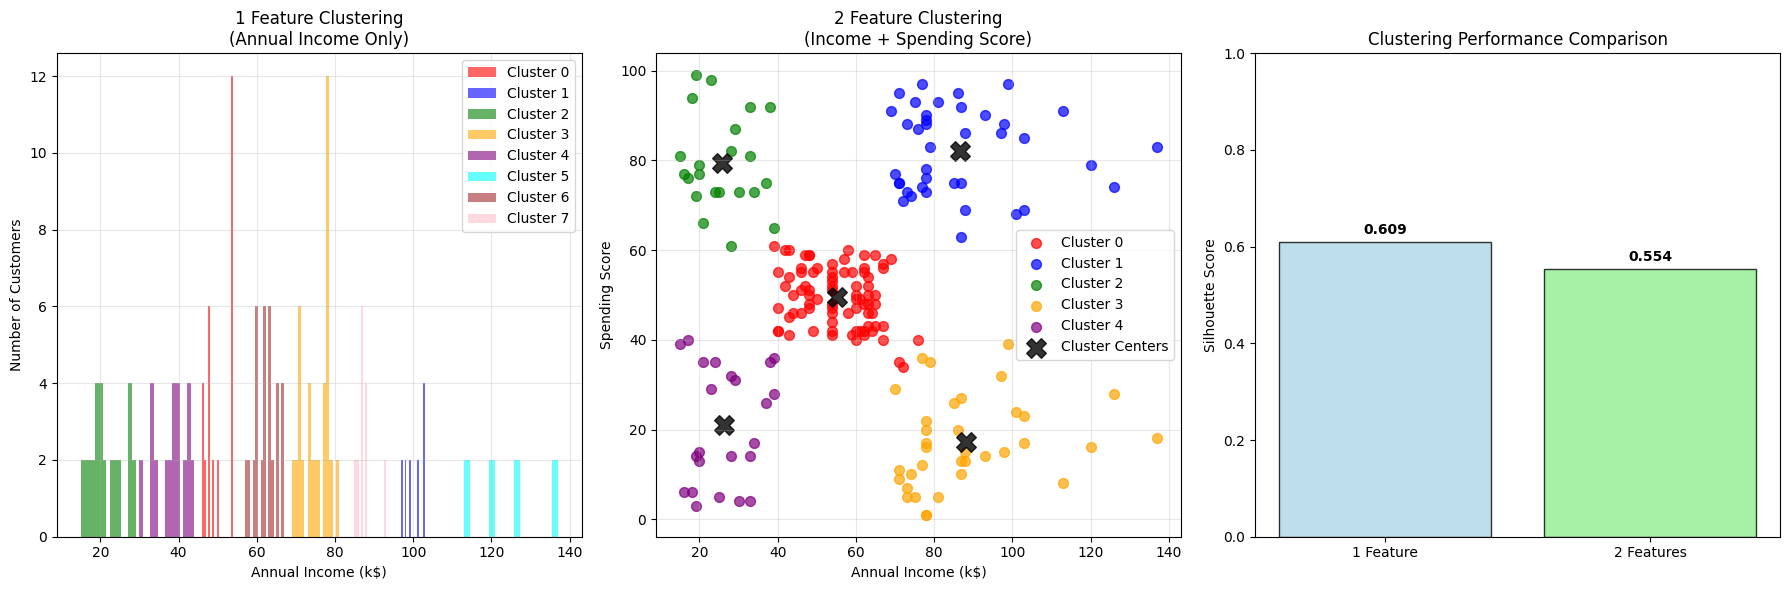

COMPARISON ANALYSIS:
1-Feature Clustering:
- Silhouette Score: 0.609
- Groups customers based solely on income brackets
- Simpler but less meaningful segmentation

2-Feature Clustering:
- Silhouette Score: 0.554
- Considers both purchasing power and shopping behavior
- Creates more meaningful customer segments
- Better for targeted marketing strategies


In [ ]:

plt.figure(figsize=(18, 6))

# 1 Feature Clustering Visualization
plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown', 'pink']

for cluster_num in range(optimal_k_1):
    cluster_data = df[df['Cluster_1feature'] == cluster_num]
    plt.hist(cluster_data['AnnualIncome'], bins=15, alpha=0.6,
             color=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.title('1 Feature Clustering\n(Annual Income Only)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2 Feature Clustering Visualization
plt.subplot(1, 3, 2)
for cluster_num in range(optimal_k_2):
    cluster_data = df[df['Cluster_2features'] == cluster_num]
    plt.scatter(cluster_data['AnnualIncome'], cluster_data['SpendingScore'],
                alpha=0.7, color=colors[cluster_num],
                label=f'Cluster {cluster_num}', s=50)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200,
            label='Cluster Centers', alpha=0.8)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('2 Feature Clustering\n(Income + Spending Score)')
plt.legend()
plt.grid(True, alpha=0.3)

# Silhouette Score Comparison
plt.subplot(1, 3, 3)
models = ['1 Feature', '2 Features']
sil_scores = [silhouette_score(X1, df['Cluster_1feature']),
              silhouette_score(X2, df['Cluster_2features'])]

bars = plt.bar(models, sil_scores, color=['lightblue', 'lightgreen'],
               edgecolor='black', alpha=0.8)

plt.ylabel('Silhouette Score')
plt.title('Clustering Performance Comparison')
plt.ylim(0, 1)

# Add value labels on bars
for bar, score in zip(bars, sil_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("COMPARISON ANALYSIS:")
print(f"1-Feature Clustering:")
print(f"- Silhouette Score: {sil_scores[0]:.3f}")
print(f"- Groups customers based solely on income brackets")
print(f"- Simpler but less meaningful segmentation")

print(f"\n2-Feature Clustering:")
print(f"- Silhouette Score: {sil_scores[1]:.3f}")
print(f"- Considers both purchasing power and shopping behavior")
print(f"- Creates more meaningful customer segments")
print(f"- Better for targeted marketing strategies")

QUESTION FIVE

In [ ]:

# Analyze the 2-feature clusters
cluster_analysis = df.groupby('Cluster_2features').agg({
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("CUSTOMER SEGMENTS PROFILES:")
for cluster_id, row in cluster_analysis.iterrows():
    income, spending, count = row['AnnualIncome'], row['SpendingScore'], row['Count']

    # Define segment type based on characteristics
    if income > 70 and spending > 60:
        segment_type = "PREMIUM CUSTOMERS"
    elif income < 40 and spending < 40:
        segment_type = "BUDGET CUSTOMERS"
    elif spending > 60:
        segment_type = "BIG SPENDERS"
    elif income < 40:
        segment_type = "VALUE SEEKERS"
    else:
        segment_type = "BALANCED CUSTOMERS"

    print(f"\nCluster {cluster_id} ({segment_type}):")
    print(f"  - {count} customers")
    print(f"  - Average Income: ${income:.1f}k")
    print(f"  - Average Spending Score: {spending:.1f}")

print("\nRECOMMENDED ENGAGEMENT STRATEGIES:")

strategies = {
    "PREMIUM CUSTOMERS": [
        "• VIP concierge services",
        "• Exclusive event invitations",
        "• Personal shopping assistants",
        "• Early access to new collections",
        "• Luxury brand partnerships"
    ],
    "BIG SPENDERS": [
        "• Premium loyalty programs",
        "• Special discount tiers",
        "• Birthday and anniversary rewards",
        "• Cross-selling opportunities",
        "• Personalized recommendations"
    ],
    "BALANCED CUSTOMERS": [
        "• Standard loyalty programs",
        "• Seasonal promotions",
        "• Email marketing campaigns",
        "• Family package deals",
        "• Social media engagement"
    ],
    "VALUE SEEKERS": [
        "• Discount programs and coupons",
        "• Value bundle offers",
        "• Sale event notifications",
        "• Budget-friendly brand promotions",
        "• Cashback rewards"
    ],
    "BUDGET CUSTOMERS": [
        "• Entry-level loyalty points",
        "• Clearance section highlights",
        "• Essential item promotions",
        "• Affordable luxury options",
        "• Payment plan options"
    ]
}

# Apply strategies based on actual clusters
for cluster_id, row in cluster_analysis.iterrows():
    income, spending = row['AnnualIncome'], row['SpendingScore']

    if income > 70 and spending > 60:
        segment = "PREMIUM CUSTOMERS"
    elif income < 40 and spending < 40:
        segment = "BUDGET CUSTOMERS"
    elif spending > 60:
        segment = "BIG SPENDERS"
    elif income < 40:
        segment = "VALUE SEEKERS"
    else:
        segment = "BALANCED CUSTOMERS"

    print(f"\nCluster {cluster_id} - {segment}:")
    for strategy in strategies[segment]:
        print(f"  {strategy}")

print("\nIMPLEMENTATION RECOMMENDATIONS:")
print("1. Use cluster data to personalize marketing communications")
print("2. Develop targeted loyalty programs for each segment")
print("3. Train staff to recognize and serve different customer types")
print("4. Monitor segment performance and adjust strategies quarterly")
print("5. Use digital channels for personalized offers to each cluster")

CUSTOMER SEGMENTS PROFILES:

Cluster 0 (BALANCED CUSTOMERS):
  - 81.0 customers
  - Average Income: $55.3k
  - Average Spending Score: 49.5

Cluster 1 (PREMIUM CUSTOMERS):
  - 39.0 customers
  - Average Income: $86.5k
  - Average Spending Score: 82.1

Cluster 2 (BIG SPENDERS):
  - 22.0 customers
  - Average Income: $25.7k
  - Average Spending Score: 79.4

Cluster 3 (BALANCED CUSTOMERS):
  - 35.0 customers
  - Average Income: $88.2k
  - Average Spending Score: 17.1

Cluster 4 (BUDGET CUSTOMERS):
  - 23.0 customers
  - Average Income: $26.3k
  - Average Spending Score: 20.9

RECOMMENDED ENGAGEMENT STRATEGIES:

Cluster 0 - BALANCED CUSTOMERS:
  • Standard loyalty programs
  • Seasonal promotions
  • Email marketing campaigns
  • Family package deals
  • Social media engagement

Cluster 1 - PREMIUM CUSTOMERS:
  • VIP concierge services
  • Exclusive event invitations
  • Personal shopping assistants
  • Early access to new collections
  • Luxury brand partnerships

Cluster 2 - BIG SPENDERS